In [1]:
"""Make sure the reward functions work how I expect them to"""
import numpy as np
import matplotlib.pyplot as plt
from influence_moo.env.env import Rewards, AUV, ASV, POI
from influence_moo.plotting import plot_grid, plot_pts

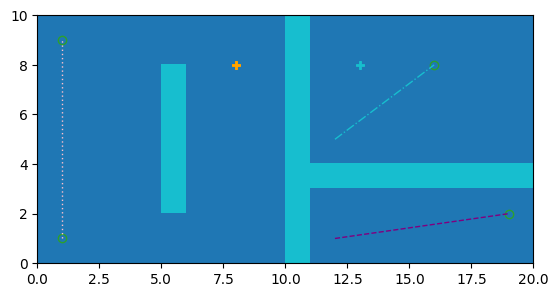

In [2]:
# Spoof a rollout
connectivity_grid = np.ones((20, 10))
connectivity_grid[10,:] = 0.0
connectivity_grid[5,2:8] = 0.0
connectivity_grid[10:,3] = 0.0

pois = [
    POI(position=np.array([1,9]), value=0.3, observation_radius=1.0),
    POI(position=np.array([1,1]), value=2.5, observation_radius=1.0),
    POI(position=np.array([16,8]), value=1.2, observation_radius = 1.0),
    POI(position=np.array([19,2]), value=3.7, observation_radius = 1.0)
]
poi_positions = np.array([poi.position for poi in pois])

auvs = [
    AUV(targets=[None], max_velocity=None),
    AUV(targets=[None], max_velocity=None),
    AUV(targets=[None], max_velocity=None)
]

auv0_xs = np.linspace(1.,1.,100)
auv0_ys = np.linspace(1.,9.,100)
auvs[0].path = np.array([auv0_xs, auv0_ys]).T

auv1_xs = np.linspace(12.,19.,100)
auv1_ys = np.linspace(1.,2.,100)
auvs[1].path = np.array([auv1_xs, auv1_ys]).T

auv2_xs = np.linspace(12.,16.,100)
auv2_ys = np.linspace(5.,8.,100)
auvs[2].path = np.array([auv2_xs, auv2_ys]).T

asvs = [
    ASV(position=None, auvs=auvs, connectivity_grid=None, policy_function=None),
    ASV(position=None, auvs=auvs, connectivity_grid=None, policy_function=None)
]

asv0_xs = np.linspace(8.,8.,100)
asv0_ys = np.linspace(8.,8.,100)
asvs[0].path = np.array([asv0_xs, asv0_ys]).T

asv1_xs = np.linspace(13,13,100)
asv1_ys = np.linspace(8,8,100)
asvs[1].path = np.array([asv1_xs, asv1_ys]).T

fig, ax = plt.subplots(1,1,dpi=100)
plot_grid(connectivity_grid, cmap='tab10_r')
plot_pts(poi_positions, ax, marker='o', fillstyle='none', linestyle='none',color='tab:green')
plot_pts(auvs[0].path, ax, ls=(0, (1,2)), color='pink', lw=1)
plot_pts(auvs[1].path, ax, ls='dashed', color='purple', lw=1)
plot_pts(auvs[2].path, ax, ls='dashdot', color='tab:cyan', lw=1)
plot_pts(asvs[0].path, ax, marker='+', color='orange')
plot_pts(asvs[1].path, ax, marker='+', color='tab:cyan')
# POI OBSERVATION RADIUS NOT TO SCALE

In [4]:
# Calculate rewards for that rollout
rewards = Rewards(
    pois = pois,
    connectivity_grid = connectivity_grid,
    collision_step_size = 0.1,
    influence_heuristic = "line_of_sight",
    influence_type = "granular",
    auv_reward = "difference",
    asv_reward = "indirect_difference_auv",
    multi_reward = "multiple",
    distance_threshold = None
)
print(rewards.compute(auvs, asvs))

Computed G
Computed influence_array
Computed asvs_minus_j_list
Computed counterfactual_influence_list
Computed influence_j_list
Computed auvs_minus_j_list
[[<influence_moo.env.env.AUV object at 0x717056e86710>, <influence_moo.env.env.AUV object at 0x717056e85960>, <influence_moo.env.env.AUV object at 0x717056ec4f10>], [<influence_moo.env.env.AUV object at 0x717056ec4e20>, <influence_moo.env.env.AUV object at 0x717056ec48b0>, <influence_moo.env.env.AUV object at 0x717056ec51e0>]]
Computed counterfactual_G_j_list
[[0.2999999999999998, -0.9000000000000004, 1.5999999999999996], [0.9000000000000004, 0.0, 3.7], 7.7]


In [5]:
rewards = Rewards(
    pois = pois,
    connectivity_grid = connectivity_grid,
    collision_step_size = 0.1,
    influence_heuristic = "line_of_sight",
    influence_type = "granular",
    auv_reward = "difference",
    asv_reward = "indirect_difference_team",
    multi_reward = "multiple",
    distance_threshold = None
)
print(rewards.compute(auvs, asvs))

Computed G
Computed influence_array
Computed asvs_minus_j_list
Computed counterfactual_influence_list
Computed influence_j_list
Computed auvs_minus_j_list
[[<influence_moo.env.env.AUV object at 0x717056fdcee0>, <influence_moo.env.env.AUV object at 0x717056e86b30>, <influence_moo.env.env.AUV object at 0x717056e865f0>], [<influence_moo.env.env.AUV object at 0x717056e86c80>, <influence_moo.env.env.AUV object at 0x7170b1eabc10>, <influence_moo.env.env.AUV object at 0x7170b1f4bac0>]]
Computed counterfactual_G_j_list
[0.2999999999999998, 1.2000000000000002]
